In [1]:
!pip install langchain langsmith langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing i

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

In [3]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [4]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

In [7]:
!pip install arxiv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=8fe51ba3646b37eab037971e9eb944d2e595fe08abc321287bf0e14d4dc07450
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [10]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)

In [11]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=fa017d3af6573cb85b74124f051a86b20e0510322e6f6c19f63f87f725aa89bd
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [12]:
wiki_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper = wiki_wrapper)

In [13]:
wiki_tool.invoke("who is rophnan")

"Page: Rophnan\nSummary: Rophnan Nuri Muzeyin (Ge'ez: ሮፍናን ኑሪ ሙዘይን; born 22 June 1990), known mononymously as Rophnan (stylized as all caps), is an Ethiopian musician. Rophnan entered into the mainstream recognition after his  debut album Reflection, which pioneered electronic music in Ethiopia."

In [14]:
arxiv_tool.invoke("attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [15]:
tools=[wiki_tool, arxiv_tool]

## Langgraph

In [16]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8


In [18]:
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list, add_messages]

In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq

In [23]:
from google.colab import userdata
import os
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY'] = userdata.get('LANGCHAIN_API_KEY')
llm = ChatGroq(model_name='Gemma2-9b-It')
graph_builder = StateGraph(State)

In [25]:
llm_with_tools= llm.bind_tools(tools=tools)


In [26]:
def chatbot(state:State):
  return {"messages": [llm_with_tools.invoke(state['messages'])]}

In [27]:
graph_builder.add_node("chatbot", chatbot)

In [28]:
from langgraph.prebuilt import ToolNode, tools_condition
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [29]:
graph_builder.add_conditional_edges(
    "chatbot", tools_condition
)

In [35]:
graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("chatbot", END)


In [36]:
graph=graph_builder.compile()

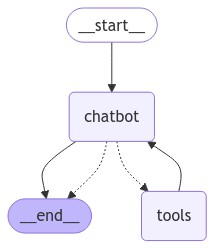

In [37]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages': ("user", user_input) }, stream_mode='values'):
    event['messages'][-1].pretty_print()


================================ Human Message =================================

tell me about rophnan
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_chgr)
 Call ID: call_chgr
  Args:
    query: Rophnan
================================= Tool Message =================================
Name: wikipedia

Page: Rophnan
Summary: Rophnan Nuri Muzeyin (Ge'ez: ሮፍናን ኑሪ ሙዘይን; born 22 June 1990), known mononymously as Rophnan (stylized as all caps), is an Ethiopian musician. Rophnan entered into the mainstream recognition after his  debut album Reflection, which pioneered electronic music in Ethiopia.
================================== Ai Message ==================================

Rophnan is an Ethiopian musician who pioneered electronic music in Ethiopia with his debut album "Reflection".
